# Project Guideline

# KELOMPOK 16
##Fania Salsa Komara(10124434)
##Ilham Fikriya Syahdan(10124585)
##Juan Marcos Siringoringo(10124628)
##Kayla Defianti Azelia(10124641)
##Mohammad Fawwa'z Ardiyanto(10124743)

<br>


## Data Understanding

Menjelajahi struktur dan karakteristik dari sebuah data.

Menulis kode untuk mengkoneksikan notebook ke Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Memasukkan library yang akan kamu gunakan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Mengambil file .csv dari Google Drive kamu.

In [4]:
df = pd.read_csv('/content/drive/MyDrive/juan data/sales_data.csv', sep=';')

In [5]:
df.head()

,"Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep"
0,"1052,2023-02-03,Bob,North,5053.97,18,Furniture..."
1,"1093,2023-04-21,Bob,West,4384.02,17,Furniture,..."
2,"1015,2023-09-21,David,South,4631.23,30,Food,26..."
3,"1072,2023-08-24,Bob,South,2167.94,39,Clothing,..."
4,"1061,2023-03-24,Charlie,East,3750.2,13,Electro..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                           --------------  ----- 
 0   Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [7]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/juan data/sales_data.csv', sep=',')  # Gantilah 'namafile.csv' sesuai nama file asli
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB
None


## Data Cleaning

Menangani nilai yang hilang, outlier, dan mempersiapkan variabel.

In [8]:
df.isnull().sum()

,0
Product_ID,0
Sale_Date,0
Sales_Rep,0
Region,0
Sales_Amount,0
Quantity_Sold,0
Product_Category,0
Unit_Cost,0
Unit_Price,0
Customer_Type,0


In [9]:
print(df.isnull().sum())  # Menampilkan jumlah nilai hilang per kolom



Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64


In [10]:
# Select features and target
X = df[['Quantity_Sold', 'Unit_Cost', 'Unit_Price', 'Discount',
          'Product_Category', 'Customer_Type', 'Region', 'Sales_Channel']]
y = df['Sales_Amount']


## Exploratory Data Analysis

Memvisualisasikan hubungan, distribusi data, dan lain sebagainya.


Visualisasi Distribusi Variabel Kategorikal:


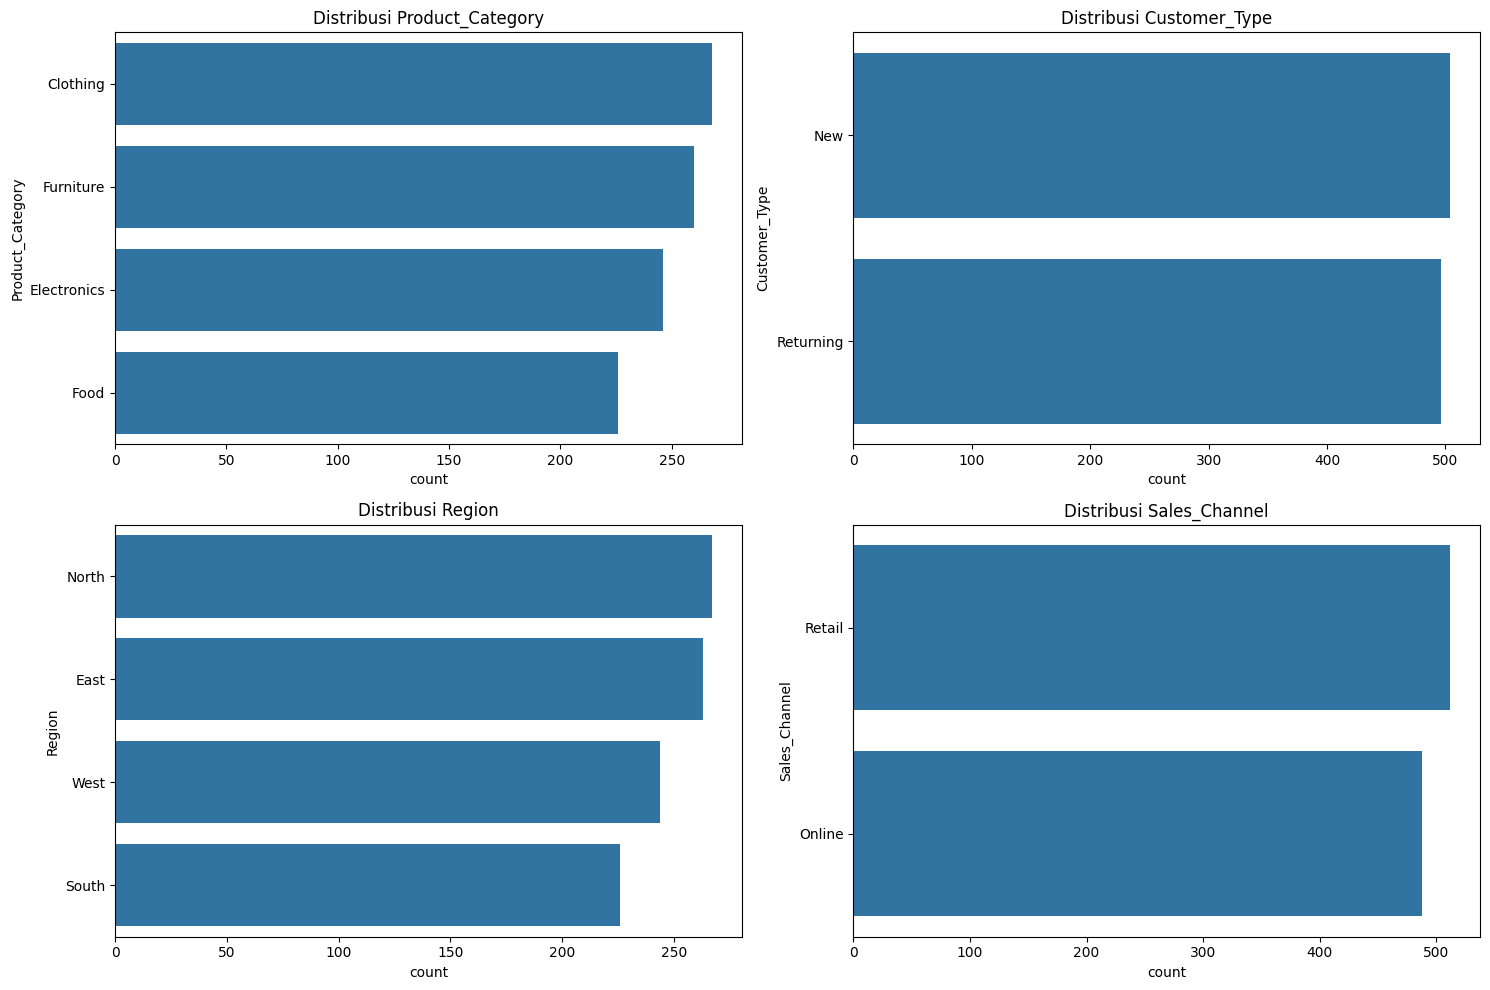

In [11]:
categorical_cols = ['Product_Category', 'Customer_Type', 'Region', 'Sales_Channel']

print("\nVisualisasi Distribusi Variabel Kategorikal:")

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(y=df[col], order = df[col].value_counts().index) # Menggunakan y dan order untuk bar horizontal
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

## Data Preparation

Memisahkan data training dan testing

## Model Building

Membuat regresi linier pada. Silakan mengeksplorasi dataset kamu terlebih dahulu dengan berbagai kombinasi prediktor.

In [12]:
from sklearn.model_selection import train_test_split

# Misalkan X adalah fitur, dan y adalah target
X_train, X_test, y_train, y_test = train_test_split(
    X, y,           # fitur dan target
    test_size=0.2,  # 20% data untuk testing
    random_state=42 # agar hasil selalu konsisten saat diulang
)


## Evaluation

Melakukan evaluasi model yang telah dibuat menggunakan plot dan metrik evaluasi, serta tambahkan interpretasi hasilnya.

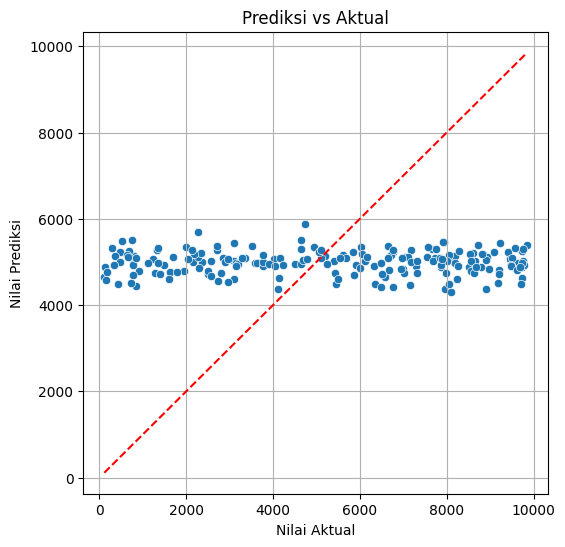

In [14]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Garis ideal
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Prediksi vs Aktual')
plt.grid(True)
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE:  2735.45
MSE:  9446119.52
RMSE: 3073.45
R² Score: -0.02
